# Het internet als databron # 

## Introductie webscraping met Jupyter en Python ## 
[**Ed. de Feber**](mailto:e.defeber@horizoncollege.nl)  
ROC Horizon College

---

Ik wil jullie in deze korte introductie WebScraping laten zien hoe je met Jupyter en Python vrij eenvoudig data kan halen uit bestaande bronnen op het internet.

Ik heb de introductie als volgt ingedeeld



### 1. Python en Jupyter? ### 
### 2. WebScraping? It's all about the data ###
### 3. Verschillende manieren om data binnen te halen en te gebruiken ###
- Bestaande API's gebruiken die vaak door de social networks worden geleverd (Facebook, Twitter, Linked In, ...). Valt buiten deze introductie.
- Bestaande Tabellen gebruiken
- Content uit nieuwspagina's, Wikipedia, enz binnen halen 
- Inlezen van openbare bronbestanden, meestal in excel, csv formaat, die aan ons ter beschikking worden gesteld door een derde partij. Keuze uit DUO, CBS, MBO-Raad, SBB, )
- Het ontleden van een webpagina of volledige websites, om daar relevante data uit te halen (Stages, Beroepsprofielen, Vacatures, ...).

## 1. Python en Jupyter ##

     

#### **Python**
Een programeertaal dat over het algemeen als de standaard wordt gezien gezien in de wereld van DataScience en AI. Alle grote spelers zoals Google, Spotify, Amazon, Facebook, enz. maken gebruik van Python. Mooi om te vermelden is dat Python in de jaren 90 van de vorige eeuw is bedacht en ontwikkeld door een Nederlander **Guido van Rossem**
( ik meen zelfs dat hij op dat moment nog student aan de UvA was ). 

Vorig jaar is Guido ingelijfd door Microsoft dus het moge duidelijk zijn dat ook Microsoft Python omarmd heeft. 

#### **Jupyter**
Is het platform waar jullie nu tegenaan kijken. Het is een zogenaamde NOTEBOOK, en wordt zeer vaak gebruikt door Dataspecialisten om inzichten, resultaten aan opdrachtgevers te presenteren. Een Jupyter notebook kan gedeeld worden op het internet en biedt de mogelijkheid om op 1 plaats data afkomstig van meerdere verschillende bronnen te presenteren. 

**Deze Jupyter notebook wordt met jullie gedeeld op:**

[MijnNotebooek](https://mybinder.org/v2/gh/EdF2021/presentatie/e351f478f248817bb3c240e9871062abbeaf6b1e?filepath=introductie_databronnen.ipynb)

---



## 2. WebScraping ##

In deze introductie interpreteer ik het begrip Webscraping heel ruim als een verzameling van methoden en technieken om data uit internetbronnen te halen. Van het inlezen van een HTML Tabel die al kant en klaar op een webpagina te vinden is, via het gebruiken van openbare databronnen meestal in Excel of CSV formaat, tot aan het uit een rafelen van een complete website en/of het combineren van dit alles en hierbij data uit meerdere internetsites te combineren. Ik laat dit voor het gemak hier samenvallen onder het begrip WebScraping. 

En waarom niet? 
**It's all about the resulting data!**




#### Aan de slag ### 

1.  **Inlezen en manipuleren van data**
2.  **Presenteren en visualiseren van resultaten** 

Bijna altijd als je iets met Python wilt doen maak je gebruik van een of meer bibliotheken. Dat is tevens de grote kracht van **Python**, omdat **voor** praktische **elke situatie** wel **een bibliotheek** te vinden is. Hieronder **importeren** we een aantal bibliotheken* waaronder pandas en matplotlib. Panda is de held als het gaat om statistieken en Matrix rekenen en Matplotlib is de absolute grootheid als het gaat om Grafieken e.d.  


In [2]:
# !pip install pandas numpy requests_html openpyxl matplotlib bqplot newspaper3k
import pandas as pd
import requests
from requests_html import HTMLSession
from ipywidgets import Image
# import pyxll
import openpyxl

%matplotlib inline
import ipywidgets as widgets
import bqplot.pyplot as plt

## 3. Verschillende manieren om data binnen te halen en te gebruiken ##

### Laten we beginnen met een artikel uit een krant te halen ###

**NU.nl**

Hiervoor importeer ik bibliotheek newspaper in Python. Deze bibliotheek kan voor praktisch elke nieuwssite gebruikt worden en kent semantische entiteiten als Artikel, Auteur, enz.

### Artikel van nu.nl met "Newspaper bibliotheek" ###


In [3]:
from newspaper import Article
from requests_html import HTMLSession

De eerste stap is om tegen Python vertellen welke url ik wil binnen halem. Vervolgs maakt Python daar dan een connectie mee.

**Hieronder een artikel dat ik afgelopen zondag vond**

![alt text](./images/nunl3.PNG "nu.nl afgelopen zondag")


**Deze pagina heeft de volgende url**

In [4]:
url = "https://www.nu.nl/coronavirus/6177311/voor-het-eerst-sinds-half-november-minder-dan-vierhonderd-coronapatienten-op-ic.html"

Met de newspaper bibliotheek hebben we de beschikking over een zogenaamd **Article Object**.

In drie stappen kunnen we hiermee een krantenartikel binnen halen:
1. Eerst maken we een Article object, die we article noemen.
2. Dan gaan we de pagina downloaden,
3. en tenslotte parsen.

In [5]:
article = Article(url)
article.download()
article.parse()

**Het article object bewaart alle resultaten.**

De belangrijkste zijn **title, authors, publish_date en text**. 
Ik zal ze hieronder tonen.

In [6]:
article.title

'Voor het eerst sinds november minder dan vierhonderd coronapatiënten op ic'

In [7]:
article.authors

['Door']

Authors returns a list. In this case, it only has one item. 

In [8]:
article.publish_date

In this case, publish_date returns the publication date and time converted into a Python datetime object. 

In [9]:
print(article.text)

Het aantal patiënten met een coronabesmetting dat verzorgd wordt op de intensive care, is gedaald tot onder de vierhonderd. Momenteel liggen er 397 coronapatiënten op de ic-afdelingen van Nederlandse ziekenhuizen, blijkt zondag uit cijfers van het Landelijk Coördinatiecentrum Patiënten Spreiding.

Er zijn zondag acht ic-plekken minder bezet door coronapatiënten dan een dag eerder. Dat past in het beeld van de afgelopen weken.

Het is de eerste keer sinds 16 november dat er minder dan vierhonderd coronapatiënten op de ic liggen. Sinds de piek van 642 ic-patiënten op 12 december is de bezetting scherp gedaald.

Naast de 397 bezette ic-plekken liggen er zondag nog 1.073 mensen vanwege een coronabesmetting op de verpleegafdelingen van ziekenhuizen. Ook dat is opnieuw een daling ten opzichte van de dag ervoor.

Op de ic's werden dertien nieuwe coronapatiënten opgenomen, waar dat er zaterdag zestien waren. Op de verpleegafdelingen werden 107 nieuwe patiënten met COVID-19 opgenomen, tegenover

## Zoals jullie zien hebben we de volledige tekst van het artikel teruggekregen.

**Maar wat kan je daar nou mee?**

Simpel voorbeeld woorden tellen.


In [10]:
inhoud = article.text

woordenlijst = []

for woord in inhoud.split():
    if woord.lower() not in "nog de dan het in een en er te ten op van het voor is met dat dag":
        woordenlijst.append((woord.lower(),inhoud.count(woord)))
    
woordenlijst = sorted(list(set(woordenlijst)))
    
woordenlijst = pd.DataFrame(woordenlijst,columns=["WOORD","FREQUENTIE"])
woordenlijst = woordenlijst.sort_values(by="FREQUENTIE", ascending=False)

woordenlijst = woordenlijst[["WOORD", "FREQUENTIE"]][:20]
woordenlijst

,WOORD,FREQUENTIE
43,ic,9
79,patiënten,8
25,coronapatiënten,5
11,afdelingen,4
117,ziekenhuis,4
16,bezet,4
9,aantal,4
58,minder,3
23,cijfers,3
65,nieuwe,3


In [14]:
!pip install wordcloud numpy multidict

     |████████████████████████████████| 94 kB 4.0 MB/s             


<bound method WordCloud.fit_words of <wordcloud.wordcloud.WordCloud object at 0x7f91961f1d10>>


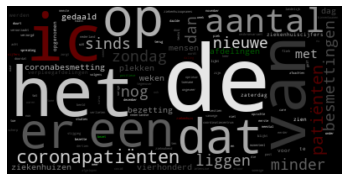

In [26]:
"""
Colored by Group Example
========================

Generating a word cloud that assigns colors to words based on
a predefined mapping from colors to words
"""

from wordcloud import (WordCloud, get_single_color_func)
import matplotlib.pyplot as plt


class SimpleGroupedColorFunc(object):
    """Create a color function object which assigns EXACT colors
       to certain words based on the color to words mapping

       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.

       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.word_to_color = {word: color
                              for (color, words) in color_to_words.items()
                              for word in words}

        self.default_color = default_color

    def __call__(self, word, **kwargs):
        return self.word_to_color.get(word, self.default_color)


class GroupedColorFunc(object):
    """Create a color function object which assigns DIFFERENT SHADES of
       specified colors to certain words based on the color to words mapping.

       Uses wordcloud.get_single_color_func

       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.

       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.color_func_to_words = [
            (get_single_color_func(color), set(words))
            for (color, words) in color_to_words.items()]

        self.default_color_func = get_single_color_func(default_color)

    def get_color_func(self, word):
        """Returns a single_color_func associated with the word"""
        try:
            color_func = next(
                color_func for (color_func, words) in self.color_func_to_words
                if word in words)
        except StopIteration:
            color_func = self.default_color_func

        return color_func

    def __call__(self, word, **kwargs):
        return self.get_color_func(word)(word, **kwargs)


text = article.text 

"""The Zen of Python, by Tim Peters
Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!"""

# Since the text is small collocations are turned off and text is lower-cased
wc = WordCloud(collocations=False).generate(text.lower())
print(wc.fit_words)
color_to_words = {
    # words below will be colored with a green single color function
    '#00ff00': ['corona', 'besmetting', 'afdelingen', 'bezet',
                'positieve', 'rules', 'practicality',
                'explicitly', 'one', 'now', 'easy', 'obvious', 'better'],
    # will be colored with a red single color function
    'red': ['ic', 'patiënten', 'ziekenhuis', 'cijfers', 'nested',
            'dense', 'daling', 'errors', 'silently', 'ambiguity',
            'guess', 'hard']
}

# Words that are not in any of the color_to_words values
# will be colored with a grey single color function
default_color = 'grey'

# Create a color function with single tone
# grouped_color_func = SimpleGroupedColorFunc(color_to_words, default_color)

# Create a color function with multiple tones
grouped_color_func = GroupedColorFunc(color_to_words, default_color)

# Apply our color function
wc.recolor(color_func=grouped_color_func)

# Plot
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()


## Meerdere pagina's uit onze nieuwssite binnenhalen
Als je **meerdere pagina's** wilt opslaan dan is het makkelijker om dit proces te automatiseren. Daarom maak ik hieronder een functie die als input een URL nodig heeft en vervolgens de meta-data en html code teruggeeft. 

In [12]:
def get_article_info(url):
    """Download and parse a newspaper url."""
    article = Article(url)
    article.download()
    article.parse()

    article_details = {
        "title": article.title,
        "text": article.text,
        "webUrl": article.url,
        "authors": article.authors,
        "html": article.html,
        "date": article.publish_date,
        "description": article.meta_description,
    }
    return article_details

**Even checken of de bovenstaande functies werken. Vul bij url je eigen nieuwspagina toe.**


In [15]:
## Je kan hier een andere pagina invullen
## Bijv. van de NOS?

url = 'https://nos.nl/artikel/2413501-onderzoekers-2g-en-3g-hebben-nu-nauwelijks-effect'
a = get_article_info(url)
print(a["title"])
print(a["authors"])
print(a["date"])
print(a["text"])


Onderzoekers: 2G en 3G hebben nu nauwelijks effect
['Hatixhe Raba', 'Redacteur Binnenland']
None
Dat het coronatoegangsbewijs minder effectief is geworden, komt vooral doordat de effectiviteit van vaccins is afgenomen. Ook het boostervaccin biedt geen optimale bescherming tegen besmetting. "Stel dat we nu een kneitergoed omikronvaccin krijgen, dan verandert de situatie mogelijk", denkt Mouter.

Het 1G-beleid, waarbij iedereen is getest, zou een stuk effectiever zijn: dat zou het reproductiegetal met 45 procent kunnen laten dalen, in het gunstigste scenario. Maar ook met deze afname komt het reproductiegetal niet onder de 1. Mouter: "Het is niet mogelijk nu met welke vorm van coronatoegangsbewijs dan ook het R-getal onder de 1 te krijgen."

Coronatoegangsbewijs in de prullenbak?

Moet het hele coronatoegangsbewijs dan de prullenbak in? "Tegenstanders zullen deze resultaten zien als een bevestiging van hun mening, maar voorstanders zullen misschien denken: het werkt enigszins en elke bes

**We kunnen dit artikel nu ook in een panda Matrix (DataFrame) plaatsen**

In [16]:
df = pd.DataFrame.from_records(a)

In [17]:
df.head()
# df['text'].text()

,authors,date,description,html,text,title,webUrl
0,Hatixhe Raba,None,,<!DOCTYPE html>\n<!--[if IE 8]> <html class...,Dat het coronatoegangsbewijs minder effectief ...,Onderzoekers: 2G en 3G hebben nu nauwelijks ef...,https://nos.nl/artikel/2413501-onderzoekers-2g...
1,Redacteur Binnenland,None,,<!DOCTYPE html>\n<!--[if IE 8]> <html class...,Dat het coronatoegangsbewijs minder effectief ...,Onderzoekers: 2G en 3G hebben nu nauwelijks ef...,https://nos.nl/artikel/2413501-onderzoekers-2g...


In [18]:
df.to_json("ap_articles.json", orient="records")

### Laten we een aantal pagina's inlezen in een lijst

In [19]:
urls = [
    "https://www.nu.nl/tech/6177312/ces-trekt-veel-minder-bezoekers-dan-voor-coronapandemie.html",
    "https://nos.nl/artikel/2413501-onderzoekers-2g-en-3g-hebben-nu-nauwelijks-effect",
    "https://nos.nl/artikel/2413502-slachtoffer-wangedrag-the-voice-op-dat-moment-ging-hij-even-voelen",
]

In [20]:
article_data = []  # Blank list to store results

# Loop over each URL
for url in urls:
    a = get_article_info(url)
    article_data.append(a)

# convert list of dictionaries to dataframe
df = pd.DataFrame.from_records(article_data)
df.columns

df_beter = df[['title', 'text', 'webUrl', 'description']].copy()

df_beter

,title,text,webUrl,description
0,Techbeurs CES trekt veel minder bezoekers dan ...,Techbeurs CES in Las Vegas heeft dit jaar veel...,https://www.nu.nl/tech/6177312/ces-trekt-veel-...,Techbeurs CES in Las Vegas heeft dit jaar veel...
1,Onderzoekers: 2G en 3G hebben nu nauwelijks ef...,Dat het coronatoegangsbewijs minder effectief ...,https://nos.nl/artikel/2413501-onderzoekers-2g...,
2,Slachtoffer wangedrag The Voice: 'Op dat momen...,Twee voormalig deelneemsters van The Voice of ...,https://nos.nl/artikel/2413502-slachtoffer-wan...,


Als we alleen de titel en de url nodig hebben

In [ ]:
df[["title", "webUrl"]]

### Wat als we iets anders willen dan de inhoud van een artikel? ###

**Stel we willen de Headlines**


In [ ]:
    

# alle_links[12].html

In [21]:
url = 'https://nu.nl/'

In [25]:
session = HTMLSession()

r = session.get(url)
r.status_code # Als dit 200 teruggeeft is de connectie gelukt

200

In [26]:
parsed_html = r.html

In [27]:
parsed_html

<HTML url='https://www.nu.nl/'>



**We moeten nu in de code op zoek naar tags. Zoeken in een brij met code dus...**

Ik laat de eerste 1000 woorden zien. Als je alle wilt zien doe dan parsed_html.html


In [29]:
parsed_html.html[:1000]

'\n<!DOCTYPE html>\n<html class="no-js " lang="nl">\n<head>\n    <meta charset="utf-8" />\n    <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" /><script type="text/javascript">(window.NREUM||(NREUM={})).init={ajax:{deny_list:["bam.nr-data.net"]}};(window.NREUM||(NREUM={})).loader_config={licenseKey:"4702f272e2",applicationID:"883437927"};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var i=e[n]={exports:{}};t[n][0].call(i.exports,function(e){var i=t[n][1][e];return r(i||e)},i,i.exports)}return e[n].exports}if("function"==typeof __nr_require)return __nr_require;for(var i=0;i<n.length;i++)r(n[i]);return r}({1:[function(t,e,n){function r(){}function i(t,e,n,r){return function(){return s.recordSupportability("API/"+e+"/called"),o(t+e,[u.now()].concat(c(arguments)),n?null:this,r),n?void 0:this}}var o=t("handle"),a=t(10),c=t(11),f=t("ee").get("tracer"),u=t("loader"),s=t(4),d=NREUM;"undefined"==typeof window.newrelic&&(newrelic=d);var p=["setPageVi

### HTML code doorzoeken  ###

We zijn op zoek naar de headlines en er bestaat een Tag **headline** dus we gaan alle tags met de naam headlines binnen halen.
    



We gebruiken hier de functie find voor

In [30]:
for item in parsed_html.find('.headline'):
    print(item.text)

2G-beleid is momenteel zinloos, 1G-beleid heeft volgens onderzoek meeste impact
Podcast
Kinderen krijgen brief voor vaccin | Vijlbrief praat weer met boze Groningers
The Voice
Verlinde wilde opmerkingen over Tan 'niet op één hoop gooien' met The Voice
Economie
We drinken minder, maar wel luxer en daar profiteert de slijter van
NU+ Klimaat
Slinkende 'koolstofbudget' maakt klimaatdoelen voor 2030 nog belangrijker
Sport
Van Gaal stemde bij FIFA-awards op Kanté, Van Dijk koos ploeggenoot Salah
Tech
Uitzondering voor mondkapjes wordt niet toegevoegd aan CoronaCheck-app
Media en Cultuur
Justice League-regisseur reageert voor het eerst op beschuldigingen wangedrag
Achterklap
Mariska Bauer is aan beterende hand na herseninfarct
Ondernemen
'Toen ik weer kanker kreeg, besloot ik fulltime ondernemer te worden'
Onderweg
Waarom auto's tegenwoordig minder lang meegaan dan vroeger
Uit andere media
De Morgen 'Niet overbevolking maar overconsumptie is het probleem'
NUshop
Bestel tickets voor A tribute 


### Hoe krijg je nu de links van de headlines? ###

Daarvoor gebruiken we de functie **absolute_links**

In [31]:
mijnlinks = []
for link in parsed_html.absolute_links:
    if 'corona' in link: # and 'covid' in link:
        mijnlinks.append(link)

df = pd.DataFrame(mijnlinks,columns =["Mijnlinks"])



#### In df staat nu de Matrix met de links in soort tabelvorm ####



In [32]:
df

,Mijnlinks
0,https://www.nu.nl/algemeen/6178778/hoe-coronah...
1,https://www.nu.nl/coronavirus
2,https://www.nu.nl/tech/6178678/uitzondering-vo...
3,https://www.nu.nl/coronavirus/6169882/ouders-k...
4,https://www.nu.nl/coronavirus/6178777/2g-belei...



#### Met de functie **absolute_links** maken we echet hyperlinks ####



In [33]:
for link in parsed_html.absolute_links:
    if 'corona' in link: # and 'covid' in link:
        
        print(link)
        print()

https://www.nu.nl/algemeen/6178778/hoe-coronahonden-zich-moeten-aanpassen-aan-de-omikronvariant.html

https://www.nu.nl/coronavirus

https://www.nu.nl/tech/6178678/uitzondering-voor-mondkapjes-wordt-niet-toegevoegd-aan-coronacheck-app.html

https://www.nu.nl/coronavirus/6169882/ouders-krijgen-een-brief-voor-kindervaccinatie.html

https://www.nu.nl/coronavirus/6178777/2g-beleid-is-momenteel-zinloos-1g-beleid-heeft-volgens-onderzoek-meeste-impact.html



In [34]:
widgets.HTML("<a href='" + df_beter["webUrl"][0] + "'>'" + df_beter["webUrl"][0] + "</a>")

HTML(value="<a href='https://www.nu.nl/tech/6177312/ces-trekt-veel-minder-bezoekers-dan-voor-coronapandemie.ht…

**Tot zover het nieuws.**

---

---




# Bestaande tabellen gebruiken #

Als voorbeeld nemen we de site van de **MBORAAD**





![alt text](./images/mboraad.PNG "MBORAAD")

## https://www.mboraad.nl/het-mbo/feiten-en-cijfers/studenten-het-mbo ##

In [37]:

mboraad_url = 'https://www.mboraad.nl/het-mbo/feiten-en-cijfers/studenten-het-mbo'

mboraad2_url = 'https://www.mboraad.nl/het-mbo/feiten-en-cijfers/aansluiting-op-de-arbeidsmarkt'
cbs_url = 'https://opendata.cbs.nl/statline/#/CBS/nl/dataset/83851NED/table?ts=1641657271358'

pd.read_html(mboraad_url)

[                                           0       1
 0                         Aantal mbo-scholen   61.00
 1                       Aantal mbo-studenten  501.50
 2                   Aantal crebo-opleidingen  686.00
 3              Aantal mbo-beroepsopleidingen  203.00
 4  Gemiddeld aantal studenten per mbo-school    8.22]

Bronnen van internet

In [39]:
html_table_list = pd.read_html(mboraad_url)


In [42]:
tabel1 = html_table_list[0]
# tabel2 = html_table_list[1]
type(tabel1)
tabel1.values

array([['Aantal mbo-scholen', 61.0],
       ['Aantal mbo-studenten', 501.5],
       ['Aantal crebo-opleidingen', 686.0],
       ['Aantal mbo-beroepsopleidingen', 203.0],
       ['Gemiddeld aantal studenten per mbo-school', 8.22]], dtype=object)

In [ ]:
# tabel2.values

**Of deze van de MBORAAD**


## https://www.mboraad.nl/het-mbo/feiten-en-cijfers/aansluiting-op-de-arbeidsmarkt ## 

### *TABEL: Aansluiting van opleidingen met huidige functie is voldoende/goed (%)* ###
---

In [44]:
html_table_list = pd.read_html(mboraad2_url)
html_table_list[0]

,Niveau,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019
0,"Bol, entree",72,70,76,67,67
1,"Bbl, entree",81,82,80,73,76
2,"Bol, niveau 2",70,74,76,64,64
3,"Bbl, niveau 2",81,82,83,83,86
4,"Bol, niveau 3",70,73,75,73,76
5,"Bbl, niveau 3",86,86,86,87,89
6,"Bol, niveau 4",69,72,73,72,74
7,"Bbl, niveau 4",82,82,81,87,89


### *TABEL Werkloosheid %* ###
---



In [45]:
html_table_list[1]

,Niveau,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019
0,"Bol, entree",189,145.0,195,159,173
1,"Bbl, entree",118,92.0,115,71,103
2,"Bol, niveau 2",111,78.0,64,63,75
3,"Bbl, niveau 2",28,21.0,11,2,22
4,"Bol, niveau 3",64,49.0,4,44,54
5,"Bbl, niveau 3",6,0.9,8,9,14
6,"Bol, niveau 4",41,33.0,26,34,52
7,"Bbl, niveau 4",13,8.0,6,6,6


In [46]:
tabel1 = html_table_list[0]
tabel2 = html_table_list[1]
type(tabel1)
tabel1.values

array([['Bol, entree', 72, 70, 76, 67, 67],
       ['Bbl, entree', 81, 82, 80, 73, 76],
       ['Bol, niveau 2', 70, 74, 76, 64, 64],
       ['Bbl, niveau 2', 81, 82, 83, 83, 86],
       ['Bol, niveau 3', 70, 73, 75, 73, 76],
       ['Bbl, niveau 3', 86, 86, 86, 87, 89],
       ['Bol, niveau 4', 69, 72, 73, 72, 74],
       ['Bbl, niveau 4', 82, 82, 81, 87, 89]], dtype=object)

In [47]:
tabel2.values

array([['Bol, entree', 189, 145.0, 195, 159, 173],
       ['Bbl, entree', 118, 92.0, 115, 71, 103],
       ['Bol, niveau 2', 111, 78.0, 64, 63, 75],
       ['Bbl, niveau 2', 28, 21.0, 11, 2, 22],
       ['Bol, niveau 3', 64, 49.0, 4, 44, 54],
       ['Bbl, niveau 3', 6, 0.9, 8, 9, 14],
       ['Bol, niveau 4', 41, 33.0, 26, 34, 52],
       ['Bbl, niveau 4', 13, 8.0, 6, 6, 6]], dtype=object)

<AxesSubplot:>

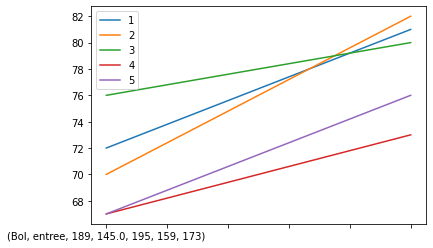

In [48]:
grafiekje = pd.DataFrame(tabel1.values, tabel2.values)

grafiekje[:2].plot()

## BESTANDEN VAN DE DUO  ##

In dit voorbeeld haal ik https://duo.nl/open_onderwijsdata/images/01-studenten-per-instelling-bestuur-plaats-gemeente-provincie-type-mbo-2016-2020.csv binnen

In [51]:
df = pd.read_csv('https://duo.nl/open_onderwijsdata/images/01-studenten-per-instelling-bestuur-plaats-gemeente-provincie-type-mbo-2016-2020.csv',sep=';',encoding="latin")
df.head()


,PEILJAAR,PROVINCIE,BEVOEGD GEZAG NUMMER,BRIN NUMMER,INSTELLINGSNAAM,PLAATSNAAM,GEMEENTE NUMMER,GEMEENTENAAM,BBL,BOLDT,BOLVT,TOTAAL
0,2016,Drenthe,40872,25PW,ROC Drenthe College,EMMEN,114,Emmen,1642.0,NaN,6256.0,7898
1,2016,Flevoland,40805,25LR,ROC van Flevoland,ALMERE,34,Almere,513.0,NaN,4500.0,5013
2,2016,Friesland,30932,08PG,ROC Friese Poort,LEEUWARDEN,80,Leeuwarden,3142.0,NaN,10365.0,13507
3,2016,Friesland,31126,12VI,Nordwin College,LEEUWARDEN,80,Leeuwarden,274.0,NaN,1398.0,1672
4,2016,Friesland,40295,25LG,ROC Friesland College,LEEUWARDEN,80,Leeuwarden,1402.0,NaN,8339.0,9741


#### Als we bijvoorbeeld alleen de INSTELLINGSNAAM willen laten zien

**ALLEEN DE EERSTE VIJF ([:5])

In [55]:
x = list(df["INSTELLINGSNAAM"])[:5]
x

['ROC Drenthe College',
 'ROC van Flevoland',
 'ROC Friese Poort',
 'Nordwin College',
 'ROC Friesland College']



**OF VIJF T/M 10 ([5:10])**

In [56]:
x = list(df["INSTELLINGSNAAM"])[5:10]
x

['SOMA College',
 'ROC Rivor',
 'ROC Graafschap College',
 'Aeres (V) MBO',
 'Rijn IJssel']



**OF OP ZOEK ZIJN NAAR DATA OVER DE PEILJAREN 2016 TM 2020 VOOR EEN BEPAALDE INSTELLING**

In [63]:
df_instelling = df[df["INSTELLINGSNAAM"]=="ROC Drenthe College"].copy()
df_instelling.head()

,PEILJAAR,PROVINCIE,BEVOEGD GEZAG NUMMER,BRIN NUMMER,INSTELLINGSNAAM,PLAATSNAAM,GEMEENTE NUMMER,GEMEENTENAAM,BBL,BOLDT,BOLVT,TOTAAL
0,2016,Drenthe,40872,25PW,ROC Drenthe College,EMMEN,114,Emmen,1642.0,NaN,6256.0,7898
67,2017,Drenthe,40872,25PW,ROC Drenthe College,EMMEN,114,Emmen,1939.0,NaN,5929.0,7868
134,2018,Drenthe,40872,25PW,ROC Drenthe College,EMMEN,114,Emmen,2079.0,NaN,5635.0,7714
198,2019,Drenthe,40872,25PW,ROC Drenthe College,EMMEN,114,Emmen,2294.0,NaN,5478.0,7772
261,2020,Drenthe,40872,25PW,ROC Drenthe College,EMMEN,114,Emmen,2253.0,NaN,5567.0,7820




**Zijn er trends waarneembaar bij de instroom BBL-ers?**

<AxesSubplot:xlabel='PEILJAAR'>

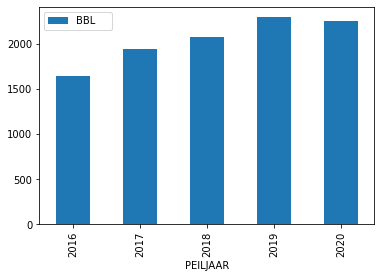

In [65]:
df_instelling[["PEILJAAR", "BBL    "]].plot.bar(x="PEILJAAR",y="BBL    ")
# df_instelling.columns



**Welke instelling heeft het grootste aantal studenten?**

In [66]:
df_grootste = df[df["TOTAAL"] == df["TOTAAL"].max()].copy()
df_grootste.head()

,PEILJAAR,PROVINCIE,BEVOEGD GEZAG NUMMER,BRIN NUMMER,INSTELLINGSNAAM,PLAATSNAAM,GEMEENTE NUMMER,GEMEENTENAAM,BBL,BOLDT,BOLVT,TOTAAL
295,2020,Noord-Holland,40833,25PZ,ROC van Amsterdam,AMSTERDAM,363,Amsterdam,5569.0,NaN,26704.0,32273


---


## Tot slot wat willekeurige grafiekjes voor de leuk ##

**Inhoudelijk geen betekenis. Bedoelt als illustratie voor wat er mogelijk is**


---

-

In [82]:
import numpy as np
import bqplot.pyplot as plt

dates = df_instelling["PEILJAAR"]



In [83]:

size = len(dates)

totaal = df_instelling["TOTAAL"] 

titel = df_instelling["INSTELLINGSNAAM"][0] + ' Aantal Studenten'

In [84]:
fig = plt.figure(title=titel, background_style={'fill': 'lightblue'},
                 title_style={'font-size': '20px','fill': 'DarkOrange'})
axes_options = {'x': {'label': 'Cohort', 'tick_format': 'i'},
                'y': {'label': 'Aantal Studenten', 'tick_format': '0.0f'}}
plt.plot(dates, totaal, 'b', axes_options=axes_options) # third argument is the marker string
fig

Figure(axes=[Axis(label='Cohort', scale=LinearScale(), tick_format='i'), Axis(label='Aantal Studenten', orient…

In [70]:
y = df["TOTAAL"] 
x = list(df["INSTELLINGSNAAM"][:5])

# 1. Create the figure object
fig = plt.figure(title='Aantal Studenten per instelling')

# 2. Customize the axes options
axes_opts = {'x': {'label': 'INSTELLING', 'grid_lines': 'none'},
             'y': {'label': 'AANTAL STUDENTEN', 'tick_format': 't'}}

# 3. Create a Bars mark by calling plt.bar function
bar = plt.bar(x=x, y=y, padding=.1, axes_options=axes_opts)

# 4. directly display the figure object created in step 1 (note that the toolbar no longer shows up)
fig

Figure(axes=[Axis(grid_lines='none', label='INSTELLING', scale=OrdinalScale()), Axis(label='AANTAL STUDENTEN',…

In [71]:
y = df["BBL    "] / df["TOTAAL"] *100

# y = dfdf["BBL    "]]

x = list(df["INSTELLINGSNAAM"][35:43])

# 1. Create the figure object
fig = plt.figure(title='Percentage BBL studenten')

# 2. Customize the axes options
axes_opts = {'x': {'label': 'INSTELLING', 'grid_lines': 'none'},
             'y': {'label': 'PERCENTAGE BBL STUDENTEN', 'tick_format': 't' }}

# 3. Create a Bars mark by calling plt.bar function
bar = plt.bar(x=x, y=y, padding=.1, axes_options=axes_opts)

# 4. directly display the figure object created in step 1 (note that the toolbar no longer shows up)
fig

Figure(axes=[Axis(grid_lines='none', label='INSTELLING', scale=OrdinalScale()), Axis(label='PERCENTAGE BBL STU…

In [72]:
y_data_2 =  df["BOLVT  "]
y_data_3 = df["BBL    "]
y_data = df["TOTAAL"]

plt.figure(title='STUDENTEN LEERWEG')


plt.scatter(y_data_2, y_data_3, color=y_data, stroke='black')
plt.show()



In [73]:
import numpy as np

df_instelling = df[df["INSTELLINGSNAAM"]=="ROC Drenthe College"].copy()
df_instelling.head()
x_data = df_instelling["INSTELLINGSNAAM"]
# np.cumsum(np.random.randn(size) * 100.0)
y_data = np.absolute(df["BBL    "]/ df["TOTAAL"]) * 100

plt.figure()
plt.hist(y_data, colors=['OrangeRed'])
plt.show()

In [74]:
plt.figure()
d = abs(df["TOTAAL"][:5])
plt.pie(d, labels = ["2016","2017","2018","2019","2020"], )
plt.show()


In [75]:
plt.figure()
plt.geo(map_data='WorldMap')
plt.show()

In [76]:
df = pd.read_csv('https://duo.nl/open_onderwijsdata/images/02-combinatie-crebo-en-beroep-2020-2021.csv',sep=';',encoding="latin")
df.head()


,CREBO CODE,VOLGNUMMER SBB,DOMEIN MBO CODE,DOMEIN MBO NAAM,HOOFDGROEPCODE SBB,HOOFDGROEPNAAM SBB,SUBGROEPCODE SBB,SUBGROEPNAAM SBB,BEROEPSOPLEIDING CODE SBB,BEROEPSOPLEIDING NAAM SBB,...,LEERWEG MBO,STUDIEBELASTINGSUREN,PRIJSFACTOR MBO,BRIN NUMMER KENNISCENTRUM,NAAM KENNISCENTRUM,MBO SECTOR,SECTORUNITNAAM SBB,STARTDATUM KWALIFICATIE,UITERSTE INSTROOMDATUM,EINDDATUM KWALIFICATIE
0,10001,1329,79080,Handel en ondernemerschap,hg006,Handel en ondernemerschap,sg031,Management en ondernemerschap,bc333,Ondernemerschap retail,...,BO BB,6400,"1,1",00SE,Kenniscentrum Handel,economie,Sectorunit handel,19970801,20000801,20040731
1,10002,1206,79090,Economie en administratie,hg005,Economie en administratie,sg059,Zakelijke dienstverlening,bc388,Commercie,...,BO BB,6400,"1,1",00SE,Kenniscentrum Handel,economie,Sectorunit handel,19970801,20120801,20170731
2,10003,1330,79080,Handel en ondernemerschap,hg006,Handel en ondernemerschap,sg031,Management en ondernemerschap,bc333,Ondernemerschap retail,...,BO BB,6400,"1,1",00SE,Kenniscentrum Handel,economie,Sectorunit handel,19970801,20000801,20040731
3,10004,1331,79080,Handel en ondernemerschap,hg006,Handel en ondernemerschap,sg031,Management en ondernemerschap,bc333,Ondernemerschap retail,...,BO BB,6400,"1,1",00SE,Kenniscentrum Handel,economie,Sectorunit handel,19970801,20010801,20050731
4,10005,1311,79080,Handel en ondernemerschap,hg006,Handel en ondernemerschap,sg031,Management en ondernemerschap,bc313,Management retail,...,BO BB,5600,"1,1",00SE,Kenniscentrum Handel,economie,Sectorunit handel,19970801,20000801,20030731


In [77]:
df.sample(7)

,CREBO CODE,VOLGNUMMER SBB,DOMEIN MBO CODE,DOMEIN MBO NAAM,HOOFDGROEPCODE SBB,HOOFDGROEPNAAM SBB,SUBGROEPCODE SBB,SUBGROEPNAAM SBB,BEROEPSOPLEIDING CODE SBB,BEROEPSOPLEIDING NAAM SBB,...,LEERWEG MBO,STUDIEBELASTINGSUREN,PRIJSFACTOR MBO,BRIN NUMMER KENNISCENTRUM,NAAM KENNISCENTRUM,MBO SECTOR,SECTORUNITNAAM SBB,STARTDATUM KWALIFICATIE,UITERSTE INSTROOMDATUM,EINDDATUM KWALIFICATIE
3426,95110,2040,79060,Mobiliteit en voertuigen,hg010,Mobiliteit en voertuigen,sg034,Mobiliteitstechniek,bc387,Fietstechniek,...,BO BB,4800,"1,4",02FZ,Innovam Groep,techniek,"Sectorunit mobiliteit, transport, logistiek, m...",20100801,20120801,20160731
2401,90461,1097,79090,Economie en administratie,hg005,Economie en administratie,sg001,Administratieve dienstverlening,bc299,Financieel administratieve beroepen,...,BO BB,6400,1,00SP,ECABO,economie,Sectorunit zakelijke dienstverlening en veilig...,20050801,20120801,20170731
3460,95312,1644,79050,Informatie en communicatietechnologie,hg008,Informatie en communicatietechnologie,sg023,ICT en media,bc425,Software development,...,BO BB,6400,"1,4",02PT,Kenniscentrum GOC,techniek,Sectorunit creatieve industrie en ICT,20110801,20160801,20220731
1692,25212,1851,79040,Media en vormgeving,hg009,Media en vormgeving,sg043,Ruimtelijke vormgeving,bc362,Ruimtelijke vormgeving,...,BO BB,6400,"1,4",02FW,Savantis,techniek,Sectorunit creatieve industrie en ICT,20150801,0,0
1515,25033,192,79010,"Afbouw, hout en onderhoud",hg001,"Afbouw, hout en onderhoud",sg047,Schoonmaak en glazenwassen,bc345,Schoonmaak en glazenwassen,...,BO BB,3200,"1,4",02FW,Savantis,economie,"Sectorunit voedsel, groen en gastvrijheid",20150801,0,0
538,10539,372,79020,Techniek en procesindustrie,hg002,Entree,sg061,Entree,bc365,Entree,...,BO BB,1600,"1,2",02PR,Kenteq,techniek,Bovensectoraal,19970801,20120801,20140731
850,10874,3051,79100,Veiligheid en sport,hg015,Veiligheid en sport,sg048,Sport en bewegen,bc350,Sport en bewegen,...,BO BB,6400,"1,5",02QG,Calibris,zorg en welzijn,"Sectorunit zorg, welzijn en sport",20020801,20120801,20170731


In [78]:
df = pd.read_excel(r'https://duo.nl/open_onderwijsdata/images/03-erkende-niet-bekostigde-opleidingen.xlsx')
df.head()


# https://duo.nl/open_onderwijsdata/images/2021-kwaliteitsafspraken-per-instelling.xlsx

,BRINNUMMER,SCHOOLNAAM,ADRES SCHOOL,POSTCODE SCHOOL,PLAATS SCHOOL,CREBONUMMER,LEERWEG,SOORT OPLEIDING,NAAM OPLEIDING,DATUM INGANG GOEDKEURING
0,00GT,Stichting Albeda,Rosestraat 1101,3071 AL,ROTTERDAM,25134,OVO,vakopleiding,Commercieel medewerker,2021-08-01
1,00GT,Stichting Albeda,Rosestraat 1101,3071 AL,ROTTERDAM,25149,OVO,basisberoepsopleiding,Medewerker (financiële) administratie,2019-09-01
2,00GT,Stichting Albeda,Rosestraat 1101,3071 AL,ROTTERDAM,25150,OVO,basisberoepsopleiding,Medewerker secretariaat en receptie,2019-09-01
3,00GT,Stichting Albeda,Rosestraat 1101,3071 AL,ROTTERDAM,25159,OVO,basisberoepsopleiding,Basismedewerker mode,2019-09-01
4,00GT,Stichting Albeda,Rosestraat 1101,3071 AL,ROTTERDAM,25167,OVO,basisberoepsopleiding,Verkoper,2019-09-01


In [79]:
df_albeda = df[df["SCHOOLNAAM"] == "Stichting Albeda"].copy()
df_albeda[["SCHOOLNAAM","NAAM OPLEIDING", "CREBONUMMER"]]

,SCHOOLNAAM,NAAM OPLEIDING,CREBONUMMER
0,Stichting Albeda,Commercieel medewerker,25134
1,Stichting Albeda,Medewerker (financiële) administratie,25149
2,Stichting Albeda,Medewerker secretariaat en receptie,25150
3,Stichting Albeda,Basismedewerker mode,25159
4,Stichting Albeda,Verkoper,25167
5,Stichting Albeda,Gastheer/-vrouw,25168
6,Stichting Albeda,Uitvoerend bakker,25173
7,Stichting Albeda,Kok,25180
8,Stichting Albeda,"Assistent bouwen, wonen en onderhoud",25250
9,Stichting Albeda,Assistent dienstverlening en zorg,25251


In [80]:
opleidingen = df_albeda["NAAM OPLEIDING"]
len(opleidingen)

43